In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns

In [2]:
np.random.seed(123)

In [3]:
times = pd.date_range('2000-01-01', '2001-12-31', name='time')
annual_cycle = np.sin(2 * np.pi * (times.dayofyear / 365.25 - 0.28))

In [4]:
base = 10 + 15 * annual_cycle.reshape(-1, 1)

In [31]:
tmin_values = base + 3 * np.random.randn(annual_cycle.size, 3)
tmax_values = base + 100 + 3 * np.random.randn(annual_cycle.size, 3)

In [35]:
ds = xr.Dataset({'tmin': (('time', 'location'), tmin_values),
                 'tmax': (('time', 'location'), tmax_values)},
                {'time': times, 'location': ['IA', 'IN', 'IL']})

In [7]:
ds

<xarray.Dataset>
Dimensions:   (location: 3, time: 731)
Coordinates:
  * location  (location) <U2 'IA' 'IN' 'IL'
  * time      (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 ...
Data variables:
    tmax      (time, location) float64 12.98 3.31 6.779 0.4479 6.373 4.843 ...
    tmin      (time, location) float64 -8.037 -1.788 -3.932 -9.341 -6.558 ...

In [36]:
df = ds.to_dataframe()

In [50]:
df.head()

tmax      tmin
location time                           
IA       2000-01-01  90.311783 -3.554552
         2000-01-02  89.714741 -5.033435
         2000-01-03  96.416894 -4.691945
         2000-01-04  93.291097 -6.824758
         2000-01-05  94.645452 -6.165465

In [38]:
df.describe()

,tmax,tmin
count,2193.000000,2193.000000
mean,109.936650,10.049875
std,11.162604,10.961592
min,85.381501,-11.903146
25%,99.521601,0.160592
50%,110.250155,9.927800
75%,120.282290,20.190470
max,136.964073,32.586394


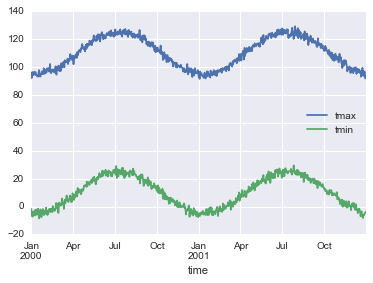

In [39]:
ds.mean(dim='location').to_dataframe().plot()

In [26]:
import matplotlib.pyplot as plt
%pylab inline
plt.show()

Populating the interactive namespace from numpy and matplotlib


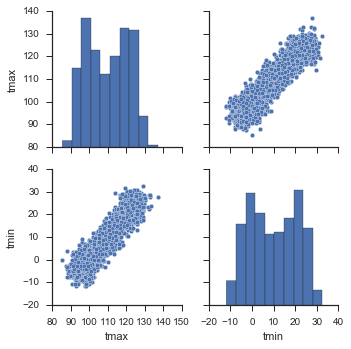

In [47]:
a = sns.pairplot(df.reset_index(), vars=ds.data_vars)


In [43]:
sns.set(style="ticks", color_codes=True)

In [48]:
ds.data_vars

Data variables:
    tmax     (time, location) float64 90.31 98.46 94.54 89.71 94.4 92.19 ...
    tmin     (time, location) float64 -3.555 -0.0124 -1.811 -5.033 -5.386 ...

In [51]:
freeze = (ds['tmin'] <= 0).groupby('time.month').mean('time')

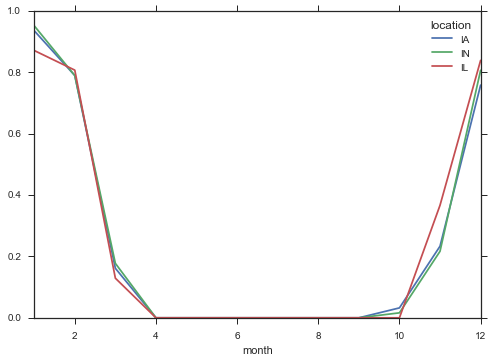

In [55]:
freeze.to_pandas().plot()

In [56]:
monthly_avg = ds.resample('1MS', dim='time', how='mean')

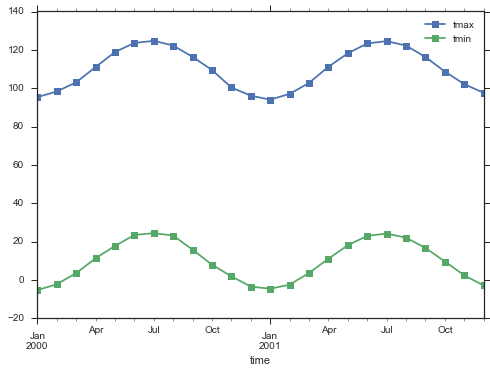

In [63]:
monthly_avg.sel(location='IA').to_dataframe().plot(style='s-')

In [65]:
climatology = ds.groupby('time.month').mean('time')

In [66]:
anomalies = ds.groupby('time.month') - climatology

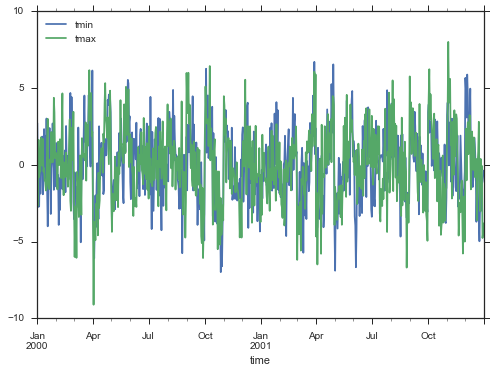

In [71]:
anomalies.mean('location').to_dataframe()[['tmin', 'tmax']].plot()

In [72]:
some_missing = ds.tmin.sel(time=ds['time.day'] > 15).reindex_like(ds)

In [73]:
filled = some_missing.groupby('time.month').fillna(climatology.tmin)

In [74]:
both = xr.Dataset({'some_missing': some_missing, 'filled': filled})

In [76]:
df = both.sel(time='2000').mean('location').reset_coords(drop=True).to_dataframe()

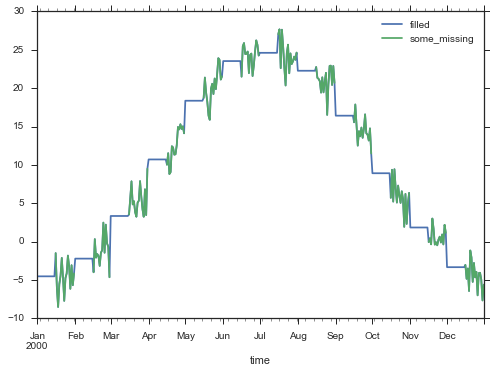

In [77]:
df[['filled', 'some_missing']].plot()